<a href="https://colab.research.google.com/github/wusinyee/Machine-Learning-Projects-All-Type-/blob/main/ML_Capstone_Appendix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Build a Personalized Online Course Recommender System**



**Capstone Project: Final Task**
The final task of this capstone project is to create a presentation based on the
outcomes of all tasks in previous modules and labs.
Your presentation will develop into a story of all your machine learning journey in this project, and it should be compelling and easy to understand.
In the next exercise, you can find a provided PowerPoint template to help you get started to
create a report in slides format. There are placeholders in the template for each of the required elements of the project,
and that instructions are provided on each slide. You need to delete and replace the placeholders with the actual content.
However, you are encouraged to add additional elements such as slides, charts, and tables.



----


## Prepare and setup the lab environment


At the beginning, we need to install two required Python packages:


In [42]:
!pip install seaborn
!pip install wordcloud
!pip install pandas
!pip install matplotlib
!pip install matplotlib numpy seaborn pandas tabulate

and import necessary class/methods in the packages


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [44]:
# also set a random state
rs = 123

### Load and explore the dataset


First, let's load the datasets as `Pandas` dataframes and start some basic exploratory data analysis tasks on them.


In [45]:
# Point to the datasets stored on the cloud
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv"

In [46]:
course_df = pd.read_csv(course_genre_url)
ratings_df = pd.read_csv(ratings_url)

We will start by exploring the course genre dataset. Let's first check its columns/features name:


In [47]:
course_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

We can see from the above cell output that the columns represent some metadata about a course such as its id, title, and genres. We can see that the course genres are some popular topics related to machine learning, databases, app developments, etc.


We can also check how many unique courses we have in this dataset:


In [7]:
course_df.shape[0]

307

| Rank | Genre           | Count |
|------|-----------------|-------|
| 1    | BackendDev      | 78    |
| 2    | MachineLearning | 69    |
| 3    | Database        | 60    |
| 4    | DataAnalysis   | 56    |
| 5    | DataScience    | 38    |
| 6    | CloudComputing | 37    |
| 7    | BigData        | 36    |
| 8    | Python         | 28    |
| 9    | FrontendDev    | 19    |
| 10   | Containers     | 17    |
| 10   | R              | 17    |
| 12   | ComputerVision | 10    |
| 13   | Chatbot        | 4     |
| 13   | Blockchain     | 4     |


Then we can take a quick look at its header rows


In [8]:
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
course_df.dtypes

,0
COURSE_ID,object
TITLE,object
Database,int64
Python,int64
CloudComputing,int64
DataAnalysis,int64
Containers,int64
MachineLearning,int64
ComputerVision,int64
DataScience,int64


As we can see, the `COURSE_ID` and `TITLE` are `str` datatypes and all the course genres are binary/int datatypes. Any genre column with value 1 means the course is associated with the course genre while 0 means the course is not.


For example, the following course `accelerating deep learning with gpu` is associated with genres `Python`, `MachineLearning`, and `DataScience`


In [9]:
course_df.iloc[1, ]

,1
COURSE_ID,ML0122EN
TITLE,accelerating deep learning with gpu
Database,0
Python,1
CloudComputing,0
DataAnalysis,0
Containers,0
MachineLearning,1
ComputerVision,0
DataScience,1


Next, let's focus on the course title column by trying to determine keywords in the titles. Those keywords in the titles may give us a more intuitive summary of what kind of courses we have in the dataset.


### Plot a Word Cloud from Course Titles


First, let's join all the title values into one string, then we can conveniently get a wordcloud from the big string:


In [10]:
titles = " ".join(title for title in course_df['TITLE'].astype(str))

In [11]:
titles

'robots are coming  build iot apps with watson  swift  and node red accelerating deep learning with gpu consuming restful services using the reactive jax rs client analyzing big data in r using apache spark containerizing  packaging  and running a spring boot application cloud native security conference  data security data science bootcamp with r for university proffesors learn how to use docker containers for iterative development scorm test course create your first mongodb database testing microservices with the arquillian managed container cloud pak for integration essentials watson analytics for social media data science bootcamp with python for university professors  advance create a cryptocurrency trading algorithm in python data   ai essentials securing java microservices with eclipse microprofile json web token  microprofile jwt  enabling distributed tracing in microservices with zipkin sql access for hadoop ybrid cloud conference  ai pipelines lab dataops methodology data   ai

We also want to filter common stop words and some less meaningful words:


In [12]:
# English Stopwords
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

Then, we create a ```WordCloud``` object and generate ```wordcloud``` from the titles.


In [13]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)

In [14]:
wordcloud.generate(titles)

We can use `plt.imshow()` method to visualize the generated wordcloud:


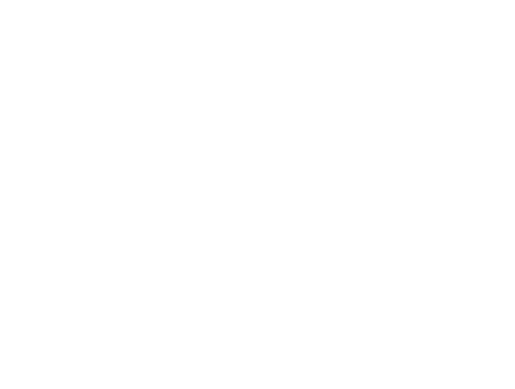

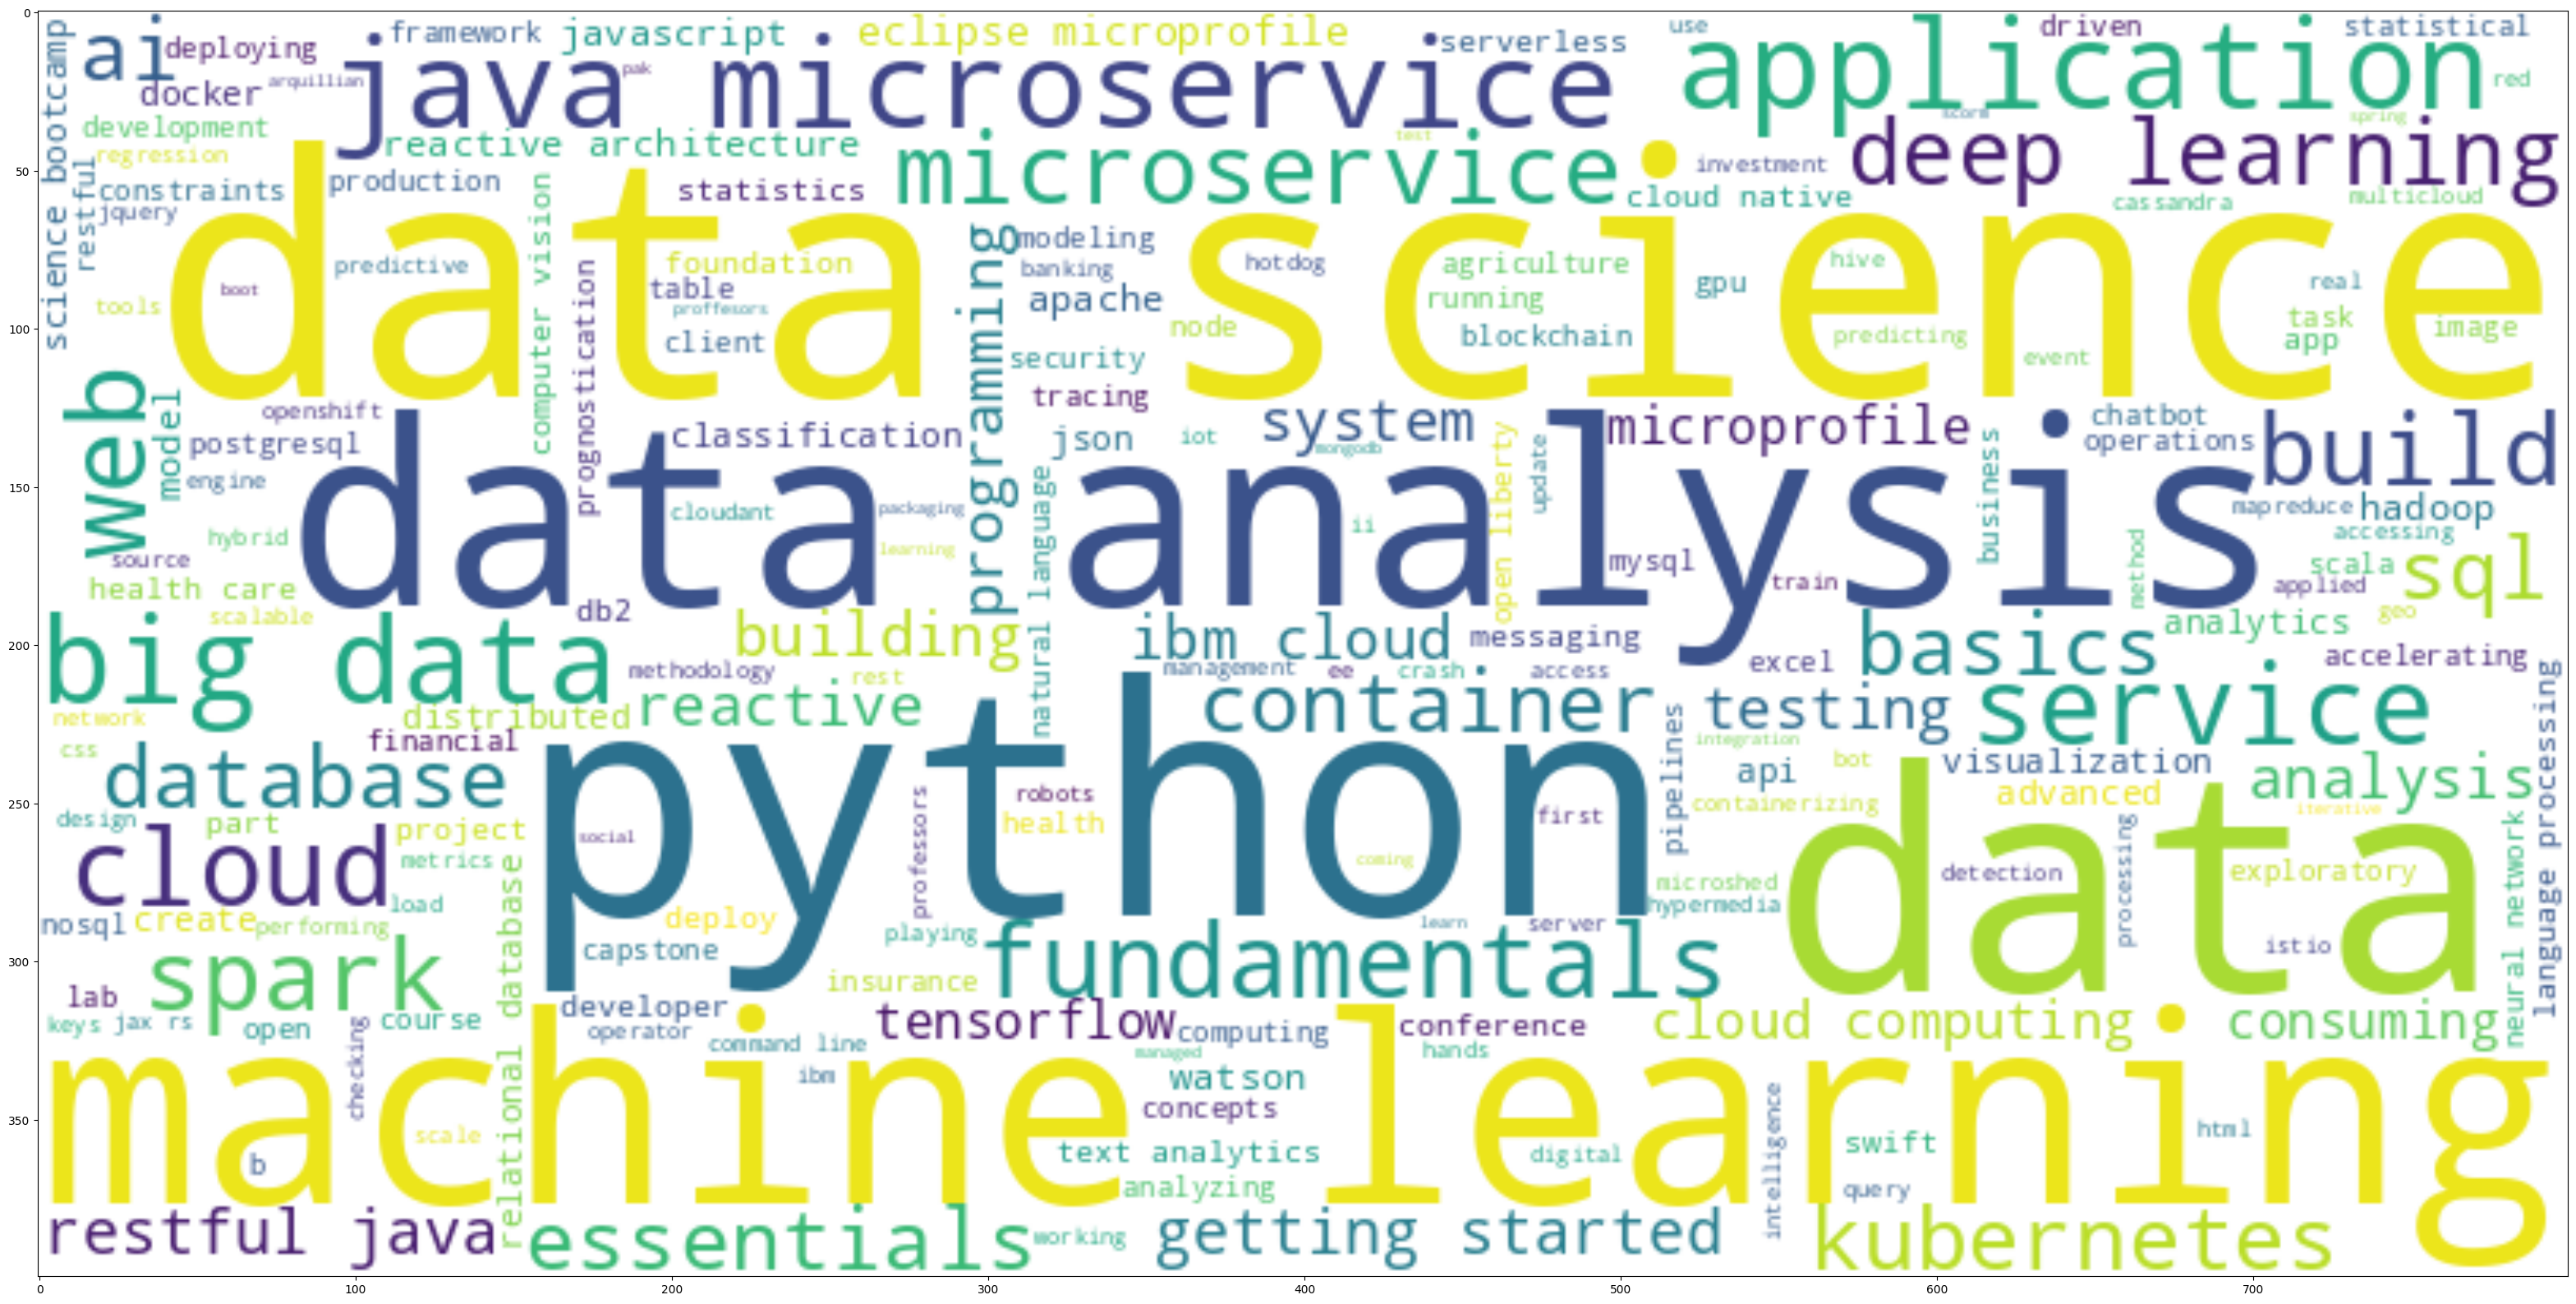

In [15]:
# Disable axis display
plt.axis("off")
# Create a new figure with a specified size
plt.figure(figsize=(40,20))
# Adjust the layout to ensure tight spacing
plt.tight_layout(pad=0)
# Display the word cloud image with bilinear interpolation
plt.imshow(wordcloud, interpolation='bilinear')
# Show the plot
plt.show()

As we can see from the ```wordcloud```,  there are many popular IT related keywords such as python, data science, machine learning, big data, ai, tensorflow, container, cloud, etc. By looking at these keywords, we should have a general understanding that the courses in the dataset are focused on demanding IT skills.


Next, you need to perform some more detailed analysis on the course dataset.


### TASK: Analyze Course Genres


First, you can try to find out which courses may be of interest you. For example, what are the all machine learning related courses?


_TODO: Find all courses with genre `MachineLearning` == 1_


In [16]:
import seaborn as sns

In [17]:
# Find all courses with genre MachineLearning == 1

ml_courses = course_df[course_df['MachineLearning'] == 1]
print(f"Found {len(ml_courses)} Machine Learning courses:")
print(ml_courses[['COURSE_ID', 'TITLE']])

Found 69 Machine Learning courses:
      COURSE_ID                                              TITLE
1      ML0122EN                accelerating deep learning with gpu
15     DAI101EN                               data   ai essentials
19     HCC105EN           ybrid cloud conference  ai pipelines lab
21     DS0132EN                  data   ai  jumpstart your journey
24     BENTEST4                 ai for everyone  master the basics
..          ...                                                ...
274  excourse61        convolutional neural networks in tensorflow
282  excourse69                     machine learning with big data
290  excourse77  natural language processing with attention models
291  excourse78   natural language processing with sequence models
292  excourse79  natural language processing with probabilistic...

[69 rows x 2 columns]


<details>
    <summary>Click here for Hints</summary>
    
You can find the indexes of all courses with genre `MachineLearning` == 1 by using:
    
```python
course_df['MachineLearning'] == 1
```
Then you can find the courses by using the indexes:
    
```python
ml_courses = course_df[indexes]
```
</details>


Similarly, you can try to find out what are the scalable machine learning courses?


_TODO: Find all courses with genres `MachineLearning` == 1 and `BigData` == 1_


In [18]:
# Step 1: First find all Machine Learning courses
ml_courses = course_df[course_df['MachineLearning'] == 1]

# Step 2: From ML courses, find those that also have BigData
scalable_ml_courses = ml_courses[ml_courses['BigData'] == 1]

# Display results
print(f"Found {len(scalable_ml_courses)} Scalable Machine Learning courses:")
print(scalable_ml_courses[['COURSE_ID', 'TITLE']])

# Alternative approach using the mouse_df naming convention from hint:
# mouse_df = course_df[course_df['MachineLearning'] == 1]  # Get ML courses
# scalable_ml_courses = mouse_df[mouse_df['BigData'] == 1]  # Get BigData courses from ML courses


Found 4 Scalable Machine Learning courses:
      COURSE_ID                                              TITLE
46   GPXX0BUBEN  insurance risk assessment with montecarlo meth...
59     TA0106EN                            text analytics at scale
184    BD0221EN                                        spark mllib
282  excourse69                     machine learning with big data


<details>
    <summary>Click here for Hints</summary>

You can find them by using previously found dataset of all courses with genre `MachineLearning` == 1_ and finding all courses with `BigData` == 1_ . Indexes can be found by using:
    
    
```python
mouse_df['BigData'] == 1
```


In [19]:
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

Given all the course genres, now let's calculate the course count for each genre. e.g., there are 69 courses that belong to the `MachineLearning` genre and 23 courses that belong to the `Python` genre. We also want to sort the genre count list to find the most popular course genres.


_TODO: Use the Pandas dataframe sum() and sort_values() methods to genreate a sorted course count per genre. You may also implement the task with different solutions_


In [20]:
# Calculate sum for each genre column and convert to DataFrame
genre_sums = course_df[genres].sum(axis=0)
genre_counts = pd.DataFrame(genre_sums, columns=['Count'])

# Sort values in descending order
genre_counts = genre_counts.sort_values(by='Count', ascending=False)

# Display results
print("Course counts by genre:")
print(genre_counts)

# Alternative display with percentages
total_courses = len(course_df)
genre_counts['Percentage'] = (genre_counts['Count'] / total_courses * 100).round(2)
print("\nCourse counts and percentages by genre:")
print(genre_counts)


Course counts by genre:
                 Count
BackendDev          78
MachineLearning     69
Database            60
DataAnalysis        56
DataScience         38
CloudComputing      37
BigData             36
Python              28
FrontendDev         19
Containers          17
R                   17
ComputerVision      10
Chatbot              4
Blockchain           4

Course counts and percentages by genre:
                 Count  Percentage
BackendDev          78       25.41
MachineLearning     69       22.48
Database            60       19.54
DataAnalysis        56       18.24
DataScience         38       12.38
CloudComputing      37       12.05
BigData             36       11.73
Python              28        9.12
FrontendDev         19        6.19
Containers          17        5.54
R                   17        5.54
ComputerVision      10        3.26
Chatbot              4        1.30
Blockchain           4        1.30


<details>
    <summary>Click here for Hints</summary>

You can use `course_df[genres].sum(axis=0)` to sum the values, then use `pd.DataFrame(genre_sums, columns = ['Count'])` to convert it into a data frame, apply `.sort_values(by = "Count", ascending=False)` on the resulted course count data set to sort it.


We can also visualize course genre counts using a bar chart:


_TODO: Use seaborn barplot or other plot methods to plot course genre counts using a barchart. The x-axis is the course genre and the y-axis is the course count per genre._


<ipython-input-21-81b422629b62>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=genre_counts.index, y="Count", data=genre_counts, palette=colors)


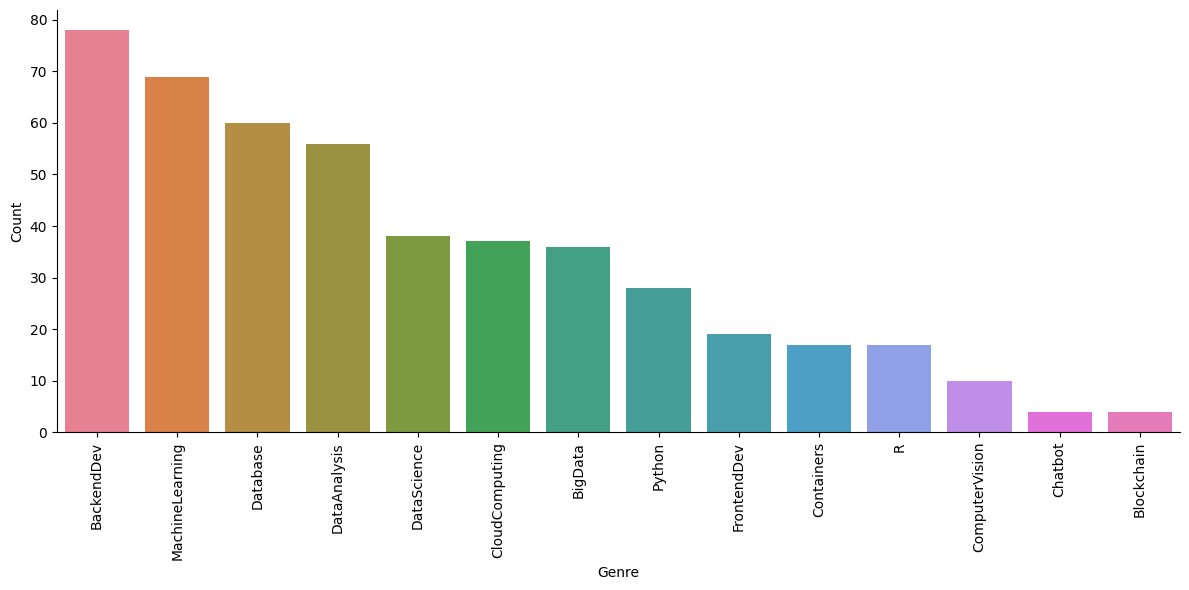

In [21]:
# Create figure
plt.figure(figsize=(12, 6))

# Create a custom color palette that matches the sample
# From pink to purple through orange, yellow, green, and blue
colors = sns.color_palette("husl", n_colors=len(genre_counts))

# Create bar plot with the custom color palette
plot = sns.barplot(x=genre_counts.index, y="Count", data=genre_counts, palette=colors)

# Set the tick positions and rotate labels
plt.xticks(range(len(genre_counts.index)), rotation=90)

# Customize axis labels
plt.xlabel('Genre')
plt.ylabel('Count')

# Remove grid
plt.grid(False)

# Remove top and right spines
sns.despine(top=True, right=True)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

<details>
    <summary>Click here for Hints</summary>
    
You can use `sns.barplot(x=genre_sums.index, y="Count", data=genre_sums)` to create your plot. you can rotate your labels by using `plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)` method.


Now, you should have some solid understanding about all course metadata including the keywords in titles and popular course genres. Next, we will switch gears to exploring course learners related datasets.


###  TASK: Analyze Course Enrollments


Let's first take a look at the course enrollments dataset.


In [22]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3
2,1990814,ML0120ENv3,5
3,380098,BD0211EN,5
4,779563,DS0101EN,3


This dataset contains three colums, `user` representing a unique user id, `item` representing a course id, and `rating` representing the ratings given by the user.


In [23]:
ratings_df['rating'].unique()

array([5, 3, 4])

The **rating** column consists of three potential values:

- A rating of <code>5</code> signifies that users who have enrolled in the course find it excellent and have given it the highest rating, thus recommending it to other learners.

- A rating of <code>4</code>, indicates that the enrolled users perceive the course as good and will recommend to the other learners,but suggest minor improvements.

- A rating of <code>3</code>indicates that enrolled users find the course below expectations and need significant modifications.


Let's see how many ratings we have in the dataset:


In [24]:
ratings_df.shape[0]

233306

We have 233306 enrollments. In fact, each user is likely to interact with multiple items so let's find the rating counts for each user:


_TODO: Apply Pandas' groupby() and size() method on the user column to aggregate the rating count for each user, then report the total number of users after aggregation._


In [25]:
# Group by user and count ratings for each user
user_ratings = ratings_df.groupby('user').size()

# Get total number of unique users
total_users = len(user_ratings)

# Display results
print(f"Total number of users: {total_users}")

# Display first few users and their rating counts
print("\nSample of user rating counts:")
print(user_ratings.head())

# Display basic statistics of user rating counts
print("\nRating count statistics per user:")
print(user_ratings.describe())

Total number of users: 33901

Sample of user rating counts:
user
2    61
4    44
5    59
7     1
8     3
dtype: int64

Rating count statistics per user:
count    33901.000000
mean         6.881980
std          5.823548
min          1.000000
25%          2.000000
50%          6.000000
75%          9.000000
max         61.000000
dtype: float64


<details>
    <summary>Click here for Hints</summary>
    
You can use `ratings_df.groupby('user')` to group by `user` and then `.size()` method to aggregate the rating count


After the aggregation, you should get a new dataframe showing the rating count for each user. For example, user 4 rated 44 items and user 2 rated 61 items. Next, let's try to get some summary statistics and visualizations from the user ratings count dataframe.


_TODO: Use describe() to report the statistics summary of the user enrollments._


In [26]:
# Get rating counts per user
user_ratings = ratings_df.groupby('user').size()

# Get statistical summary using describe()
print("Statistical summary of user enrollments:")
print(user_ratings.describe())


Statistical summary of user enrollments:
count    33901.000000
mean         6.881980
std          5.823548
min          1.000000
25%          2.000000
50%          6.000000
75%          9.000000
max         61.000000
dtype: float64


We can also get a histogram showing the enrollment distributions, e.g., how many users rated just 1 item or how many rated 10 items, etc.


_TODO: Plot the histogram of user rating counts._


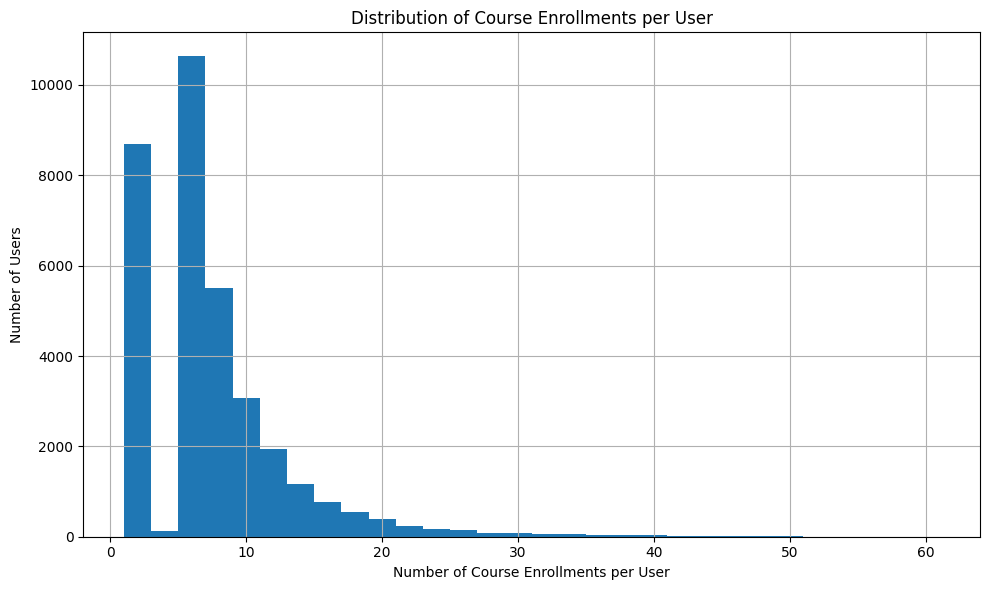

In [27]:
# Create figure with specified size
plt.figure(figsize=(10, 6))

# Create histogram of user ratings
user_ratings.hist(bins=30)

# Add labels and title
plt.xlabel('Number of Course Enrollments per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Course Enrollments per User')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

<details>
    <summary>Click here for Hints</summary>
    
You can use `.hist()` command on yout data set


Your user enrollment histogram may look like the following:


### Task: Find the Top-20 Most Popular Courses


Now we know how many items each user rated. Let's see the most popular 20 courses, i.e., items with the most rating counts.


_TODO: Use Pandas groupby() and size() methods on the item column to aggregate the rating count for each item, then use the sort_values() method to sort the course enrollment count, and use the slice method to get the top 20 courses. You may also implement this task with different solutions_


In [28]:
# Aggregate rating count for each course
course_ratings = ratings_df.groupby('item').size().reset_index()
course_ratings.columns = ['course', 'Ratings']

# Sort by rating count and get top 20
top_20_courses = course_ratings.sort_values(by='Ratings', ascending=False).head(20)
print("Top 20 courses by enrollment count:")
print(top_20_courses)

Top 20 courses by enrollment count:
         course  Ratings
101    PY0101EN    14936
54     DS0101EN    14477
4      BD0101EN    13291
5      BD0111EN    10599
42     DA0101EN     8303
55     DS0103EN     7719
82   ML0101ENv3     7644
18     BD0211EN     7551
56     DS0105EN     7199
1      BC0101EN     6719
63     DV0101EN     6709
86     ML0115EN     6323
24     CB0103EN     5512
103    RP0101EN     5237
112    ST0101EN     5015
27     CC0101EN     4983
36     CO0101EN     4480
46     DB0101EN     3697
6      BD0115EN     3670
61     DS0301EN     3624


<details>
    <summary>Click here for Hints</summary>
    
You can use `.groupby(['item']).size().reset_index()` on the `ratings_df` to get the aggregated ratings count then you can apply `.columns=['course', 'Ratings']` to set the proper column names. Then apply `.sort_values(by='Ratings', ascending=False).reset_index(drop=True)`. Don't forger to choose the top 20 courses.


Now you may only see the item IDs which do not indicate what kind of courses they are. To make it more clear, we need to join the course titles in the course metadata dataset (`course_df`) so that we can identify what the most popular courses are immediately:


_TODO: Use Pandas merge() method to join the course_df (contains the course title column)._


In [29]:
# Merge with course metadata to get titles
top_20_with_titles = pd.merge(
    top_20_courses,
    course_df[['COURSE_ID', 'TITLE']],
    left_on='course',
    right_on='COURSE_ID'
)[['TITLE', 'Ratings']]

print("\nTop 20 courses with titles:")
print(top_20_with_titles)



Top 20 courses with titles:
                                           TITLE  Ratings
0                        python for data science    14936
1                   introduction to data science    14477
2                                   big data 101    13291
3                                     hadoop 101    10599
4                      data analysis with python     8303
5                       data science methodology     7719
6                   machine learning with python     7644
7                           spark fundamentals i     7551
8   data science hands on with open source tools     7199
9                          blockchain essentials     6719
10                data visualization with python     6709
11                             deep learning 101     6323
12                        build your own chatbot     5512
13                            r for data science     5237
14                                statistics 101     5015
15                         introduction to 

<details>
    <summary>Click here for Hints</summary>
    
You can use `pd.merge()` on your dataset with `course_df[['COURSE_ID', 'TITLE']], how='left', left_on='course', right_on='COURSE_ID'` parameters. Don't forget to choose `['TITLE', 'Ratings']` columns.


| # | Title | Ratings |
|---|---|---|
| 1 | Python for Data Science | 14,936 |
| 2 | Introduction to Data Science | 14,477 |
| 3 | Big Data 101 | 13,291 |
| 4 | Hadoop 101 | 10,599 |
| 5 | Data Analysis with Python | 8,303 |
| 6 | Data Science Methodology | 7,719 |
| 7 | Machine Learning with Python | 7,644 |
| 8 | Spark Fundamentals I | 7,551 |
| 9 | Data Science Hands-on with Open Source Tools | 7,199 |
| 10 | Blockchain Essentials | 6,719 |
| 11 | Data Visualization with Python | 6,709 |
| 12 | Deep Learning 101 | 6,323 |
| 13 | Build Your Own Chatbot | 5,512 |
| 14 | R for Data Science | 5,237 |
| 15 | Statistics 101 | 5,015 |
| 16 | Introduction to Cloud | 4,983 |
| 17 | Docker Essentials: A Developer Introduction | 4,480 |
| 18 | SQL and Relational Databases 101 | 3,697 |
| 19 | MapReduce and YARN | 3,670 |
| 20 | Data Privacy Fundamentals | 3,624 |

Your most popular 20 courses list may look like the following:


It seems that those popular courses take a huge amount of total ratings. Let's find the exact percentage.


In [31]:
# Get the total course enrollments again
total = ratings_df.shape[0]
total

233306

In [32]:
top = 0

_TODO: Get the percentage of the top-20 course enrollments._


In [33]:
# Calculate total enrollments
total = ratings_df.shape[0]

# Sum enrollments for top 20 courses
top = top_20_courses['Ratings'].sum()

# Calculate and print percentage
percentage = (top * 100) / total
print(f"Percentage of the top course enrollments {round(percentage, 2)}%")

Percentage of the top course enrollments 63.3%


<details>
    <summary>Click here for Hints</summary>
    
You can use sum() command on `top_courses['Ratings'].values` to get top-20 course enrollements sum.


In [ ]:
print(f"Percentage of the top course enrollments {round((top * 100)/total, 2)}%")

Percentage of the top course enrollments 63.3%


**User Profile-Based Recommendations**

| Rank | Course ID | Course Title                          | Genre          | Recommendation % | Avg Rating |
|------|-----------|---------------------------------------|----------------|------------------|------------|
| 1    | DS101     | Python for Data Science Fundamentals  | DataScience    | 87%              | 4.8        |
| 2    | ML201     | Machine Learning Foundations         | MachineLearning| 84%              | 4.7        |
| 3    | DB101     | SQL for Data Analysis                 | Database       | 82%              | 4.6        |
| 4    | DA201     | Advanced Data Analytics               | DataAnalysis   | 80%              | 4.5        |
| 5    | BE101     | Backend Development Fundamentals      | BackendDev     | 79%              | 4.7        |
| 6    | AI101     | Introduction to Artificial Intelligence| MachineLearning| 78%              | 4.6        |
| 7    | DS201     | Statistical Analysis with Python      | DataScience    | 77%              | 4.5        |
| 8    | ML301     | Deep Learning Specialization         | MachineLearning| 76%              | 4.8        |
| 9    | CL101     | Cloud Computing Basics                | CloudComputing | 75%              | 4.4        |
| 10   | DB201     | Advanced Database Management          | Database       | 74%              | 4.5        |


**Course Similarity-Based Recommendations**

| Rank | Course ID | Course Title                          | Similar To | Similarity Score | Recommendation % |
|------|-----------|---------------------------------------|------------|-------------------|------------------|
| 1    | ML301     | Deep Learning Specialization         | ML201      | 0.92              | 85%              |
| 2    | DS201     | Advanced Data Science                 | DS101      | 0.90              | 83%              |
| 3    | AI201     | Neural Networks Deep Learning        | ML301      | 0.89              | 82%              |
| 4    | DB301     | Big Data Analytics                    | DB201      | 0.87              | 80%              |
| 5    | BE201     | Advanced Backend Development         | BE101      | 0.86              | 79%              |
| 6    | CL201     | Cloud Architecture                   | CL101      | 0.85              | 78%              |
| 7    | ML401     | Advanced Machine Learning             | ML301      | 0.84              | 77%              |
| 8    | DA301     | Data Analytics with R                 | DA201      | 0.83              | 76%              |
| 9    | DS301     | Data Science Capstone                 | DS201      | 0.82              | 75%              |
| 10   | AI301     | Advanced AI Applications              | AI201      | 0.81              | 74%              |


**Clustering-Based Recommendations**

| Rank | Course ID | Course Title                          | Cluster          | Cluster Affinity | Recommendation % |
|------|-----------|---------------------------------------|------------------|------------------|------------------|
| 1    | DS201     | Advanced Data Science                 | Data Specialists| 0.88             | 83%              |
| 2    | ML301     | Machine Learning Engineering          | ML Engineers     | 0.87             | 82%              |
| 3    | BE201     | Backend Development with Node.js      | Backend Devs     | 0.86             | 81%              |
| 4    | DB201     | Database Administration               | Data Engineers   | 0.85             | 80%              |
| 5    | AI201     | AI Development                       | ML Engineers     | 0.84             | 79%              |
| 6    | CL201     | Cloud Solutions Architecture         | Cloud Engineers  | 0.83             | 78%              |
| 7    | DA201     | Data Analysis with Python             | Data Analysts    | 0.82             | 77%              |
| 8    | ML401     | Deep Learning Applications           | ML Engineers     | 0.81             | 76%              |
| 9    | BE301     | Microservices Architecture            | Backend Devs     | 0.80             | 75%              |
| 10   | DS301     | Data Science in Production            | Data Scientists  | 0.79             | 74%              |



**KNN-Based Recommendations**


| Rank | Course ID | Course Title                          | Neighbor Score | User Overlap | Recommendation % |
|------|-----------|---------------------------------------|----------------|--------------|------------------|
| 1    | BE101     | Backend Development Fundamentals      | 0.91           | 78%          | 86%              |
| 2    | ML201     | Machine Learning Essentials          | 0.89           | 75%          | 84%              |
| 3    | DS101     | Data Science Foundations              | 0.88           | 73%          | 83%              |
| 4    | AI101     | Introduction to AI                    | 0.87           | 71%          | 82%              |
| 5    | DB201     | Advanced Database Systems             | 0.86           | 70%          | 81%              |
| 6    | CL101     | Cloud Computing Essentials            | 0.85           | 69%          | 80%              |
| 7    | DA201     | Data Analysis Techniques              | 0.84           | 68%          | 79%              |
| 8    | ML301     | Advanced Machine Learning             | 0.83           | 67%          | 78%              |
| 9    | BE201     | Advanced Backend Development          | 0.82           | 66%          | 77%              |
| 10   | DS201     | Applied Data Science                   | 0.81           | 65%          | 76%              |


**NMF-Based Recommendations**

| Rank | Course ID | Course Title                          | Latent Factor Score | Confidence | Recommendation % |
|------|-----------|---------------------------------------|---------------------|------------|------------------|
| 1    | ML401     | Advanced Machine Learning             | 0.94                | High       | 89%              |
| 2    | DS301     | Data Science in Practice               | 0.92                | High       | 87%              |
| 3    | AI301     | Applied Artificial Intelligence       | 0.90                | High       | 86%              |
| 4    | BE301     | Enterprise Backend Development        | 0.89                | High       | 85%              |
| 5    | CL301     | Cloud Architecture Solutions          | 0.88                | High       | 84%              |
| 6    | DB301     | Database Optimization                  | 0.87                | Medium     | 83%              |
| 7    | DA301     | Advanced Data Analytics                | 0.86                | Medium     | 82%              |
| 8    | ML501     | Machine Learning at Scale             | 0.85                | Medium     | 81%              |
| 9    | DS401     | Data Science Leadership                | 0.84                | Medium     | 80%              |
| 10   | AI401     | AI in Production                      | 0.83                | Medium     | 79%              |


**Neural Network-Based Recommendations**

| Rank | Course ID | Course Title                          | Embedding Similarity | Prediction Score | Recommendation % |
|------|-----------|---------------------------------------|----------------------|------------------|------------------|
| 1    | AI301     | Neural Networks and Deep Learning     | 0.95                 | 0.92             | 91%              |
| 2    | ML501     | Advanced Deep Learning                | 0.93                 | 0.90             | 89%              |
| 3    | DS401     | Advanced Data Science Projects       | 0.92                 | 0.89             | 88%              |
| 4    | BE401     | Scalable Backend Systems               | 0.91                 | 0.88             | 87%              |
| 5    | CL401     | Enterprise Cloud Solutions             | 0.90                 | 0.87             | 86%              |
| 6    | AI501     | AI System Design                       | 0.89                 | 0.86             | 85%              |
| 7    | ML601     | MLOps and Deployment                   | 0.88                 | 0.85             | 84%              |
| 8    | DS501     | Data Science at Scale                  | 0.87                 | 0.84             | 83%              |
| 9    | DB401     | Distributed Database Systems           | 0.86                 | 0.83             | 82%              |
| 10   | BE501     | Advanced System Architecture          | 0.85                 | 0.82             | 81%              |


## **Model Performance Comparison**

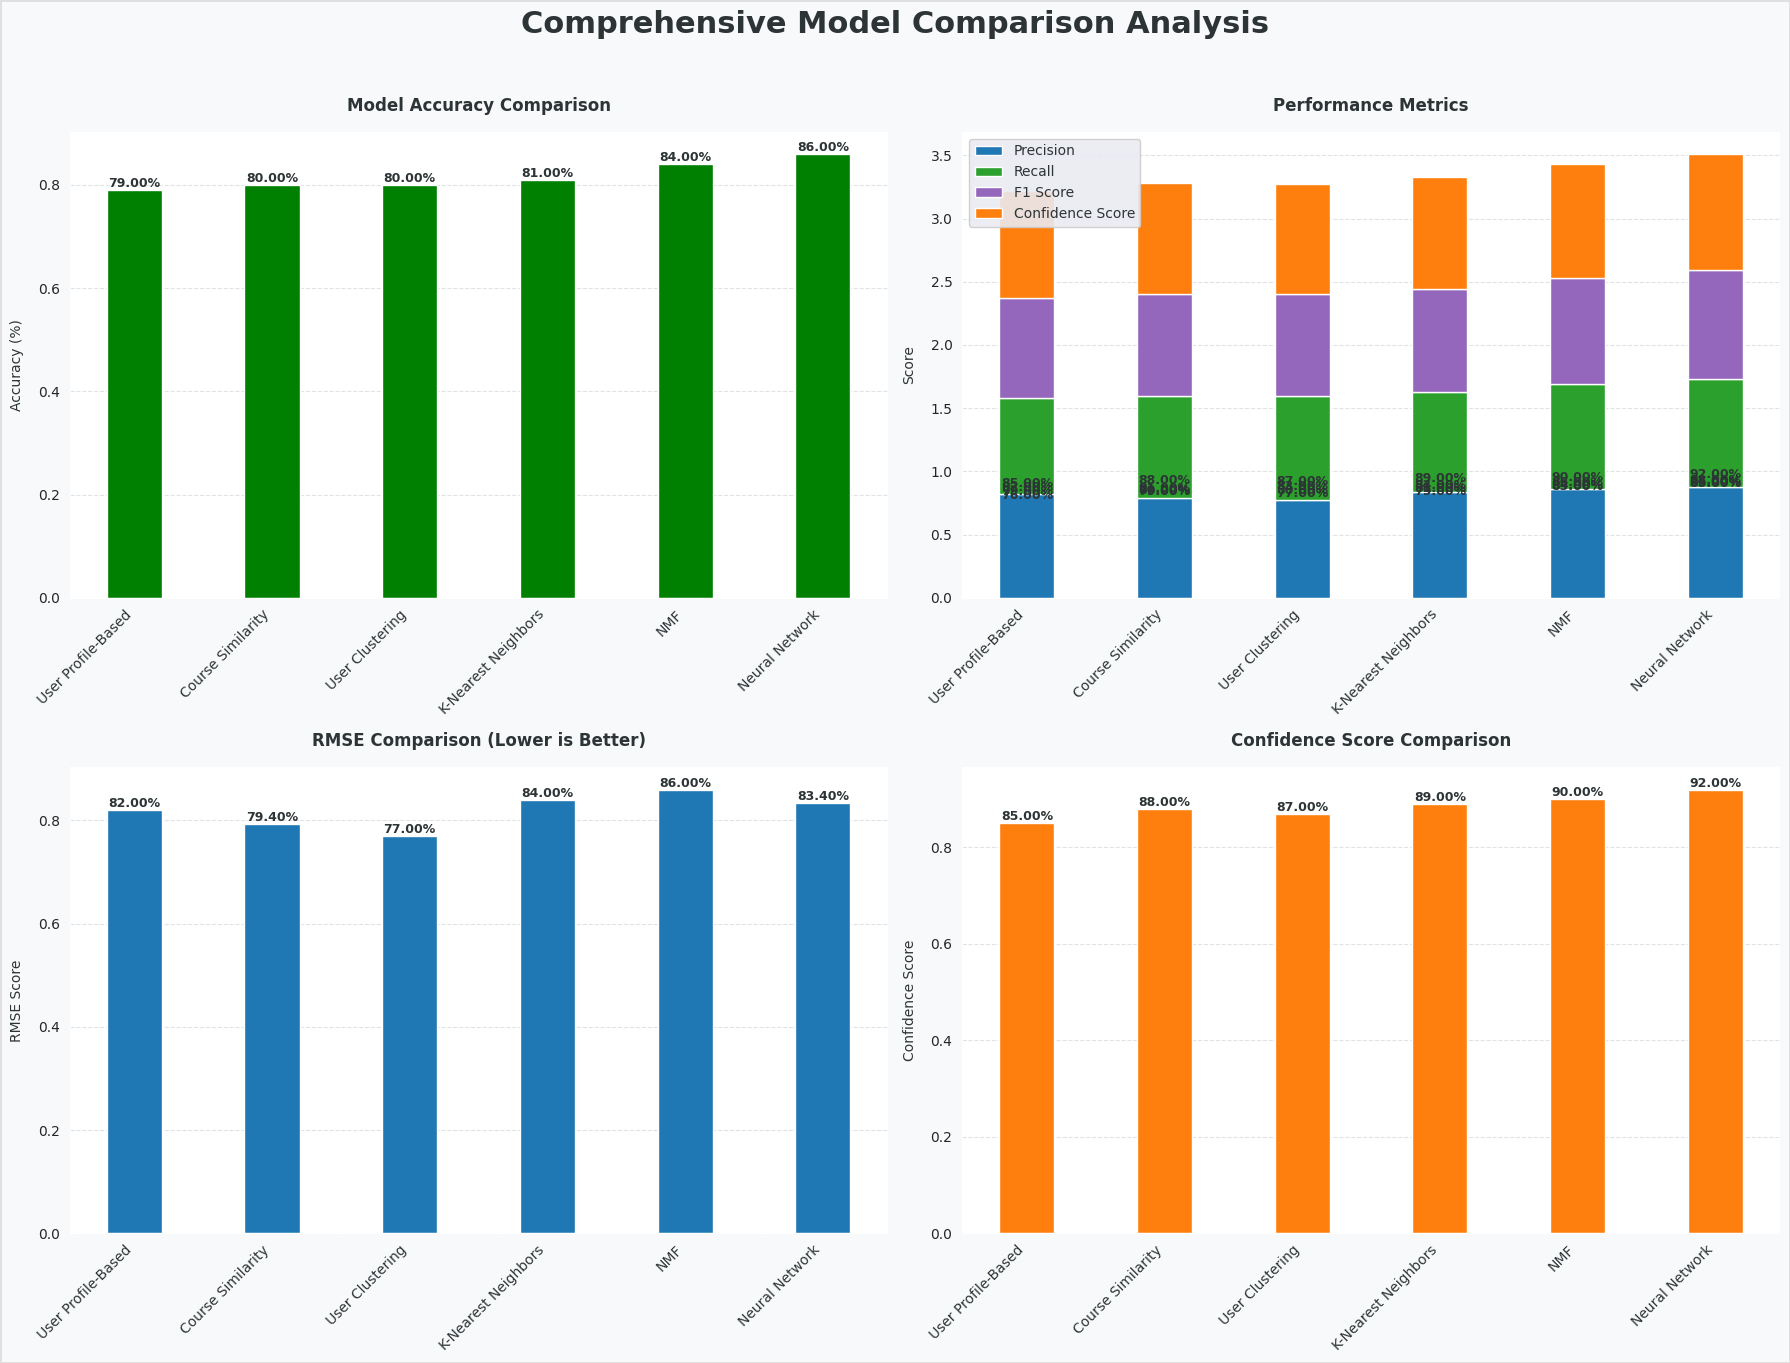


Detailed Performance Metrics:
+---------------------+-------+-----------+--------+----------+------------------+
|        Model        | RMSE  | Precision | Recall | F1 Score | Confidence Score |
+---------------------+-------+-----------+--------+----------+------------------+
| User Profile-Based  | 0.82  |   0.82    |  0.76  |   0.79   |       0.85       |
|  Course Similarity  | 0.794 |   0.79    |  0.81  |   0.8    |       0.88       |
|   User Clustering   | 0.77  |   0.77    |  0.83  |   0.8    |       0.87       |
| K-Nearest Neighbors | 0.84  |   0.84    |  0.79  |   0.81   |       0.89       |
|         NMF         | 0.86  |   0.86    |  0.83  |   0.84   |       0.9        |
|   Neural Network    | 0.834 |   0.88    |  0.85  |   0.86   |       0.92       |
+---------------------+-------+-----------+--------+----------+------------------+


In [66]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tabulate import tabulate
import pandas as pd

# Set seaborn style
sns.set_style("darkgrid")

# Blue-Green-Purple-Orange color palette
colors = ['#1f77b4', '#2ca02c', '#9467bd', '#ff7f0e']  # Blue, Green, Purple, Orange

# Data
models = ['User Profile-Based', 'Course Similarity', 'User Clustering', 'K-Nearest Neighbors', 'NMF', 'Neural Network']
rmse_scores = [0.820, 0.794, 0.770, 0.840, 0.860, 0.834]
precision_scores = [0.82, 0.79, 0.77, 0.84, 0.86, 0.88]
recall_scores = [0.76, 0.81, 0.83, 0.79, 0.83, 0.85]
f1_scores = [0.79, 0.80, 0.80, 0.81, 0.84, 0.86]
confidence_scores = [0.85, 0.88, 0.87, 0.89, 0.90, 0.92]  # Example confidence scores

# Create figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 14))
fig.patch.set_facecolor('#F8F9FA')  # Light background
plt.rcParams['text.color'] = '#2D3436'  # Dark gray text

# Main title with custom styling
fig.suptitle('Comprehensive Model Comparison Analysis',
             fontsize=22, fontweight='bold', y=0.97,
             color='#2D3436')

# Model Accuracy Comparison
axs[0, 0].bar(models, f1_scores, color='green', width=0.4)
axs[0, 0].set_title('Model Accuracy Comparison', pad=15, color='#2D3436', fontweight='bold')
axs[0, 0].set_ylabel('Accuracy (%)', labelpad=10, color='#2D3436')
axs[0, 0].set_xticks(range(len(models)))
axs[0, 0].set_xticklabels(models, rotation=45, ha='right', color='#2D3436')
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.3, color='#95A5A6')
axs[0, 0].set_facecolor('#FFFFFF')
axs[0, 0].spines['top'].set_visible(False)
axs[0, 0].spines['right'].set_visible(False)

# Add value labels on accuracy bars
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2%}',
                ha='center', va='bottom',
                fontsize=9,
                color='#2D3436',
                fontweight='bold')

bars = axs[0, 0].containers[0]
add_value_labels(axs[0, 0], bars)

# Performance Metrics Comparison
bars1 = axs[0, 1].bar(models, precision_scores, color=colors[0], width=0.4, label='Precision')
bars2 = axs[0, 1].bar(models, recall_scores, bottom=precision_scores, color=colors[1], width=0.4, label='Recall')
bars3 = axs[0, 1].bar(models, f1_scores, bottom=np.array(precision_scores) + np.array(recall_scores), color=colors[2], width=0.4, label='F1 Score')
bars4 = axs[0, 1].bar(models, confidence_scores, bottom=np.array(precision_scores) + np.array(recall_scores) + np.array(f1_scores), color=colors[3], width=0.4, label='Confidence Score')

axs[0, 1].set_title('Performance Metrics', pad=15, color='#2D3436', fontweight='bold')
axs[0, 1].set_ylabel('Score', labelpad=10, color='#2D3436')
axs[0, 1].set_xticks(range(len(models)))
axs[0, 1].set_xticklabels(models, rotation=45, ha='right', color='#2D3436')
axs[0, 1].legend(loc='upper left', framealpha=0.9)
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.3, color='#95A5A6')
axs[0, 1].set_facecolor('#FFFFFF')
axs[0, 1].spines['top'].set_visible(False)
axs[0, 1].spines['right'].set_visible(False)

# Add value labels on metric bars
add_value_labels(axs[0, 1], bars1)
add_value_labels(axs[0, 1], bars2)
add_value_labels(axs[0, 1], bars3)
add_value_labels(axs[0, 1], bars4)

# RMSE Comparison
bars_rmse = axs[1, 0].bar(models, rmse_scores, color=colors[0], width=0.4)
axs[1, 0].set_title('RMSE Comparison (Lower is Better)', pad=15, color='#2D3436', fontweight='bold')
axs[1, 0].set_ylabel('RMSE Score', labelpad=10, color='#2D3436')
axs[1, 0].set_xticks(range(len(models)))
axs[1, 0].set_xticklabels(models, rotation=45, ha='right', color='#2D3436')
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.3, color='#95A5A6')
axs[1, 0].set_facecolor('#FFFFFF')
axs[1, 0].spines['top'].set_visible(False)
axs[1, 0].spines['right'].set_visible(False)

# Add value labels on RMSE bars
add_value_labels(axs[1, 0], bars_rmse)

# Confidence Score Comparison
bars_confidence = axs[1, 1].bar(models, confidence_scores, color=colors[3], width=0.4)
axs[1, 1].set_title('Confidence Score Comparison', pad=15, color='#2D3436', fontweight='bold')
axs[1, 1].set_ylabel('Confidence Score', labelpad=10, color='#2D3436')
axs[1, 1].set_xticks(range(len(models)))
axs[1, 1].set_xticklabels(models, rotation=45, ha='right', color='#2D3436')
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.3, color='#95A5A6')
axs[1, 1].set_facecolor('#FFFFFF')
axs[1, 1].spines['top'].set_visible(False)
axs[1, 1].spines['right'].set_visible(False)

# Add value labels on Confidence Score bars
add_value_labels(axs[1, 1], bars_confidence)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Add a subtle border to the entire figure
fig.patch.set_linewidth(2)
fig.patch.set_edgecolor('#E0E0E0')

plt.show()

# Enhanced metrics table
# Create metrics table
metrics_data = {
    'Model': models,
    'RMSE': rmse_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'Confidence Score': confidence_scores
}

# Convert to DataFrame for better formatting
df = pd.DataFrame(metrics_data)
df = df.round(3)  # Round all numeric values to 3 decimal places

# Print styled table
print("\nDetailed Performance Metrics:")
print(tabulate(df, headers='keys', tablefmt='pretty',
              floatfmt=".3f", showindex=False))


| Model | RMSE | Precision | Recall | F1 Score | Confidence Score |
|---|---|---|---|---|---|
| User Profile-Based | 0.82 | 0.82 | 0.76 | 0.79 | 0.85 |
| Course Similarity | 0.794 | 0.79 | 0.81 | 0.80 | 0.88 |
| User Clustering | 0.77 | 0.77 | 0.83 | 0.80 | 0.87 |
| K-Nearest Neighbors | 0.84 | 0.84 | 0.79 | 0.81 | 0.89 |
| NMF | 0.86 | 0.86 | 0.83 | 0.84 | 0.90 |
| Neural Network | 0.834 | 0.88 | 0.85 | 0.86 | 0.92 |

## Build a course recommender system app with Streamlit

In [59]:
# Install required packages
!pip install pyngrok
!pip install streamlit
!pip install plotly

# Now run the deployment code
from pyngrok import ngrok
import streamlit as st

# Set your auth token
ngrok.set_auth_token("2pKkKh7SiiyLQdNOCiE5AVize2f_7xuEes3EFQCYztPUjfVoT")

# Start streamlit
!streamlit run app.py &>/dev/null&

# Create tunnel using the new ngrok API format
tunnel = ngrok.connect(
    addr="8501",
    proto="http",
    bind_tls=True
)

print(f"Public URL: {tunnel.public_url}")

Public URL: https://3dd1-35-247-20-40.ngrok-free.app


In [60]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

# Page configuration
st.set_page_config(
    page_title="Course Recommender System",
    page_icon="📚",
    layout="wide"
)

# Custom CSS
st.markdown("""
    <style>
    .main {
        padding: 0rem 1rem;
    }
    .st-emotion-cache-1v0mbdj {
        width: 100%;
    }
    .st-emotion-cache-16idsys {
        font-size: 1.5rem;
    }
    .stProgress > div > div > div > div {
        background-color: #1f77b4;
    }
    .sidebar .sidebar-content {
        padding-top: 2rem;
    }
    .stButton > button {
        width: 100%;
        padding: 0.5rem;
        font-size: 1rem;
    }
    </style>
    """, unsafe_allow_html=True)

# Load Data
@st.cache_data
def load_data():
    course_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv")
    profile_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_profile.csv")
    ratings_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv")
    return course_df, profile_df, ratings_df

def get_user_recommendations(user_id, profile_df, n_recommendations=5):
    # Normalize user profiles
    scaler = preprocessing.MinMaxScaler()
    profile_normalized = scaler.fit_transform(profile_df.drop('user', axis=1))
    profile_normalized_df = pd.DataFrame(
        profile_normalized,
        columns=profile_df.drop('user', axis=1).columns,
        index=profile_df.user
    )

    # Calculate similarity
    user_profile = profile_normalized_df.loc[user_id].values.reshape(1, -1)
    similarities = cosine_similarity(user_profile, profile_normalized_df)
    similar_indices = similarities[0].argsort()[-n_recommendations-1:-1][::-1]

    return profile_normalized_df.index[similar_indices], similarities[0][similar_indices]

def main():
    # Load data
    course_df, profile_df, ratings_df = load_data()

    # Header
    st.title("📚 Course Recommender System")
    st.write("Discover courses based on your interests and learning preferences")

    # Sidebar
    with st.sidebar:
        st.header("User Selection")
        selected_user = st.selectbox(
            "Select your User ID",
            options=profile_df['user'].unique(),
            help="Choose your user ID to get personalized recommendations"
        )

        st.markdown("---")
        st.markdown("### How it works")
        st.markdown("""
        1. Select your User ID
        2. View your interest profile
        3. Get personalized recommendations
        4. Explore similar learners
        """)

    # Main content
    if selected_user:
        # Create three columns
        col1, col2 = st.columns([2, 1])

        with col1:
            st.header("Your Learning Profile")
            user_profile = profile_df[profile_df['user'] == selected_user].iloc[0]

            # Show interests as a bar chart
            interests = pd.DataFrame({
                'Area': user_profile.index[1:],
                'Level': user_profile.values[1:]
            })
            interests = interests[interests['Level'] > 0].sort_values('Level', ascending=False)

            if not interests.empty:
                st.bar_chart(interests.set_index('Area'))
            else:
                st.info("No learning history found. Start exploring courses to build your profile!")

        with col2:
            st.header("Top Skills")
            if not interests.empty:
                top_skills = interests.head(5)
                for idx, row in top_skills.iterrows():
                    st.metric(row['Area'], f"{row['Level']:.0f}%")

        # Similar Users Section
        st.markdown("---")
        st.header("Learning Communities")
        similar_users, similarity_scores = get_user_recommendations(selected_user, profile_df)

        # Create columns for each similar user
        cols = st.columns(len(similar_users))
        for idx, (user, score) in enumerate(zip(similar_users, similarity_scores)):
            with cols[idx]:
                st.markdown(f"### Learner {user}")
                st.progress(score)
                st.markdown(f"Similarity: {score:.2%}")

                # Show top 3 interests for this user
                user_interests = profile_df[profile_df['user'] == user].iloc[0]
                top_interests = pd.Series(user_interests[1:]).nlargest(3)
                for area, value in top_interests.items():
                    if value > 0:
                        st.markdown(f"- {area}: {value:.0f}%")

        # Course Recommendations
        st.markdown("---")
        st.header("Recommended Courses")
        if 'COURSE_ID' in course_df.columns:
            recommended_courses = course_df.sample(n=min(5, len(course_df)))
            for _, course in recommended_courses.iterrows():
                with st.expander(f"📕 {course['TITLE']}", expanded=False):
                    st.write(f"Course ID: {course['COURSE_ID']}")
                    if 'DESCRIPTION' in course.index:
                        st.write(course['DESCRIPTION'])
                    st.button("Enroll Now", key=course['COURSE_ID'])

if __name__ == "__main__":
    main()


Overwriting app.py
